<a href="https://colab.research.google.com/github/Whaleman0423/-Python-book-practice/blob/main/tfKs_ch1_%E5%88%9D%E6%8E%A2Keras20211020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from tensorflow.keras.models import Sequential # 序列式模型類別
from tensorflow.keras.layers import Dense # 密集層列別

In [111]:
model = Sequential() # 建立序列模型物件

model.add(Dense(4, activation="relu", input_dim=3)) # 加入第 1 層，第 1 層要加 input_dim
model.add(Dense(1, activation="sigmoid"))  # 加入第 2 層

model.compile(                  # 以指定的參數編譯模型
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
                      )


###### model = Sequential() 建立序列模型物件，並指定給 model，此時 model 就是一個神經網路了，但內容是空的。

##### Mnist

In [112]:
from tensorflow.keras.datasets import mnist
# mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

######第一次載入資料集，會由網路將資料下載並儲存到本機使用者資料夾

In [113]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [114]:
train_labels[0]

5

In [115]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


###### 只秀一張圖

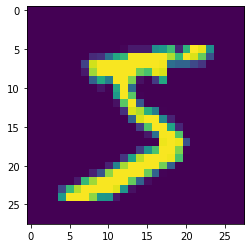

In [116]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

######隨機秀一張圖

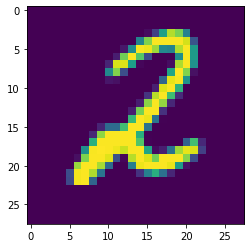

In [117]:
import random 
c = random.randint(0, 59999)
plt.imshow(train_images[c])

######連續秀一列圖

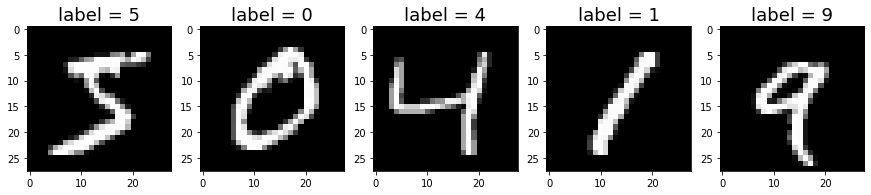

In [118]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)  # 設定圖形的寬和高(英吋)
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)  # 設定 1 * 5 的子圖表，目前要畫 1 + i 個
  ax.imshow(train_images[i], cmap="gray")  # 顯示灰階圖片(黑底白字)
  ax.set_title("label = " + str(train_labels[i]), fontsize=18)  # 設定標題
plt.show()  # 將圖形顯示出來

######隨機秀5張圖

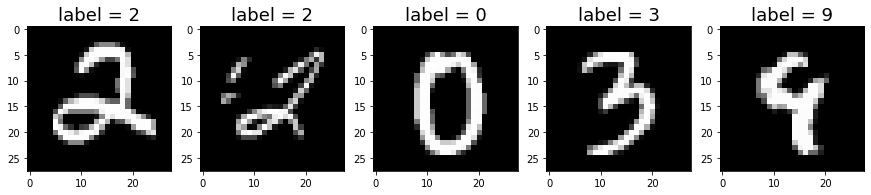

In [119]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)
c = random.sample(range(0, 60000), 5)  # 隨機取得 1 ～ 60000中的 5 個字
for i in range(5):
  ax = plt.subplot(1, 5, 1+i)
  ax.imshow(train_images[c[i]], cmap="gray")
  ax.set_title("label = " + str(train_labels[c[i]]), fontsize=18)
plt.show()

#####白底黑字，

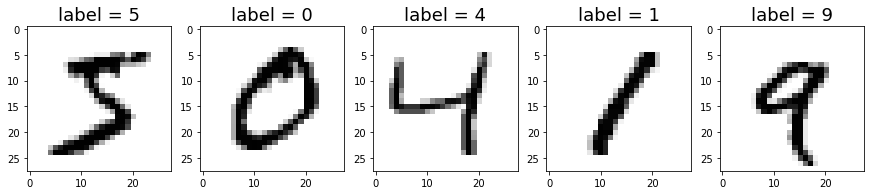

In [120]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4)
for i in range(5):
  axis = plt.subplot(1, 5, 1+i)
  axis.imshow(train_images[i], cmap="binary")
  axis.set_title("label = " + str(train_labels[i]), fontsize=18)
plt.show()

### 資料預處理(preprocess)

###### 1. 把 2D 轉成 1D
###### 2. 將像素值由 0～255 ，轉成 0～1

In [121]:
# 訓練集
x_train = train_images.reshape((60000, 28 * 28))  # 將 (60000, 28, 28) 轉換成 (60000, 784)
x_train = x_train.astype('float32') / 255.0  # 再將 0～255 的像素值轉換成 0～1的浮點數

# 測試集
x_test = test_images.reshape((10000, 28 * 28))   # 將10000筆測試集採同樣方式的轉換
x_test = x_test.astype("float32") / 255.0

###### 轉換後，再看一次shape

In [122]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


###### 標籤資料的轉換
###### 例如 : 將答案 2 轉換為 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
###### => One-hot-encoding

In [123]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)  # 將訓練標籤和測試答案做 One-hot-encoding
y_test = to_categorical(test_labels)

###### 做完 One-hot-encoding 看一下標籤的形式

In [124]:
print(train_labels[0])
print(y_train[0])
# 看一下 標籤的 shape
print(y_train.shape) # 原本是(60000,)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


### 預處理好樣本和標籤後，即可著手建立神經網路模型

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation="relu", input_dim=784))
model.add(Dense(10, activation="softmax"))
model.compile(
          optimizer="rmsprop",          # 指定優化器
          loss='categorical_crossentropy',    # 指定損失函數
          metrics=["acc"]             # 指定評量準則 
        )


#### 建好模型後，呼叫模型的 summary()，來檢視模型的摘要資訊。

In [126]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### 用準備好的 x_train(訓練樣本) 和 y_train(標籤) ， fit() 訓練模型

In [127]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2581 - acc: 0.9254
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1042 - acc: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - acc: 0.9801
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - acc: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - acc: 0.9884


####評估模型成效及修正  evaluate()

In [130]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("對測試資料集的準確率 : ", test_acc)
print("對測試資料集的lose : ", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0640 - acc: 0.9804
對測試資料集的準確率 :  0.980400025844574
對測試資料集的lose :  0.06403660029172897


In [131]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0640 - acc: 0.9804


[0.06403660029172897, 0.980400025844574]